In [ ]:
!pip3 install numpy
!pip3 install torch
!pip3 install matplotlib.pyplot


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from PIL import Image

# use bfloat16 for the entire notebook
torch.autocast(device_type="cuda", dtype=torch.bfloat16).__enter__()

if torch.cuda.get_device_properties(0).major >= 8:
    # turn on tfloat32 for Ampere GPUs (https://pytorch.org/docs/stable/notes/cuda.html#tensorfloat-32-tf32-on-ampere-devices)
    torch.backends.cuda.matmul.allow_tf32 = True
    torch.backends.cudnn.allow_tf32 = True

In [ ]:
def show_anns(anns, borders=True):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.5]])
        img[m] = color_mask
        if borders:
            import cv2
            contours, _ = cv2.findContours(m.astype(np.uint8),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
            # Try to smooth contours
            contours = [cv2.approxPolyDP(contour, epsilon=0.01, closed=True) for contour in contours]
            cv2.drawContours(img, contours, -1, (0,0,1,0.4), thickness=1)

    ax.imshow(img)

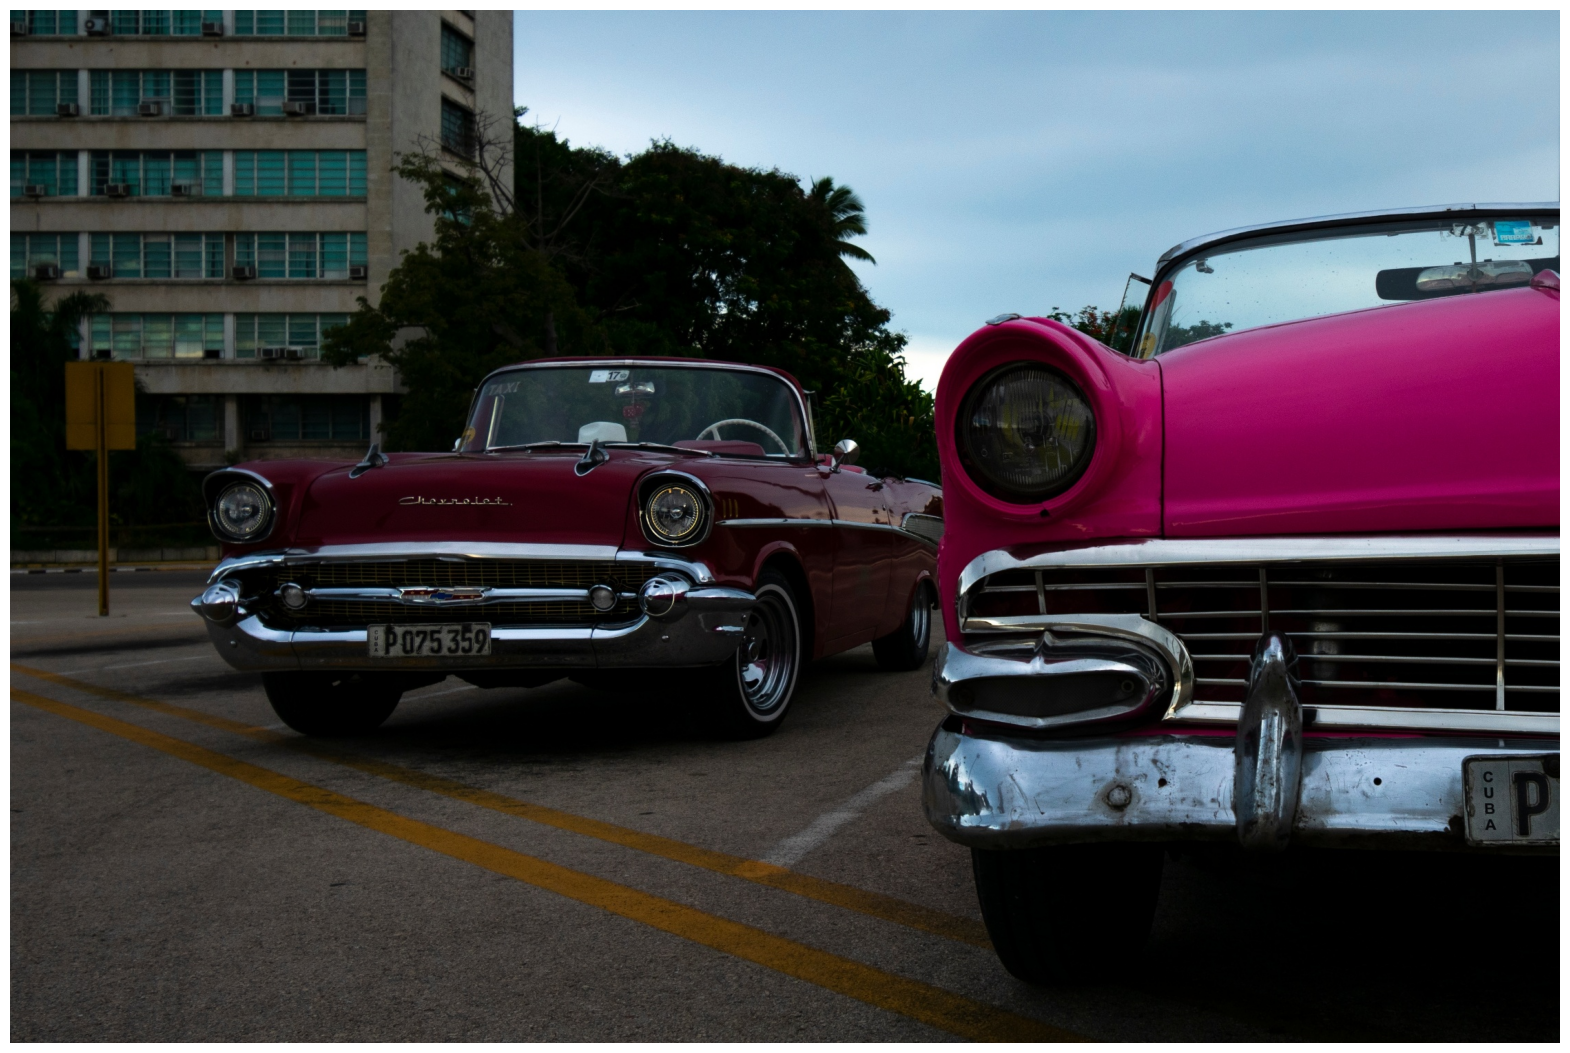

In [5]:
image = Image.open('/content/sample_data/cars.jpg')
image = np.array(image.convert("RGB"))


plt.figure(figsize=(20,20))
plt.imshow(image)
plt.axis('off')
plt.show()


In [6]:
!pip3 install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 862.6/862.6 kB 43.6 MB/s eta 0:00:00


In [9]:


from ultralytics import SAM


# Load a model
model = SAM("sam2_b.pt")

# Display model information
model.info()

# Segment with bounding box prompt
results1 = model("/content/sample_data/cars.jpg", bboxes=[100, 100, 200, 200])

# Segment with point prompt
results2 = model("/content/sample_data/cars.jpg", points=[150, 150], labels=[1])

results3 = model("/content/sample_data/cars.jpg")


Model summary: 566 layers, 80,833,666 parameters, 80,833,666 gradients

image 1/1 /content/sample_data/cars.jpg: 1024x1024 503.4ms
Speed: 22.4ms preprocess, 503.4ms inference, 0.4ms postprocess per image at shape (1, 3, 1024, 1024)

image 1/1 /content/sample_data/cars.jpg: 1024x1024 426.2ms
Speed: 10.2ms preprocess, 426.2ms inference, 0.4ms postprocess per image at shape (1, 3, 1024, 1024)

image 1/1 /content/sample_data/cars.jpg: 1024x1024 1 0, 1 1, 1 2, 1 3, 1 4, 1 5, 1 6, 1 7, 1 8, 1 9, 1 10, 1 11, 1 12, 1 13, 1 14, 1 15, 1 16, 1 17, 1 18, 1 19, 1 20, 1 21, 1 22, 1 23, 1 24, 1 25, 1 26, 10977.1ms
Speed: 37.3ms preprocess, 10977.1ms inference, 5.4ms postprocess per image at shape (1, 3, 1024, 1024)


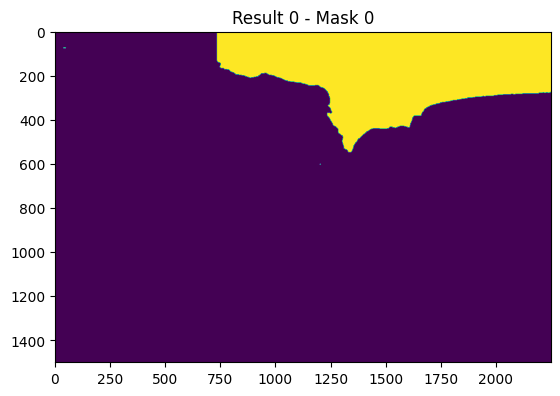

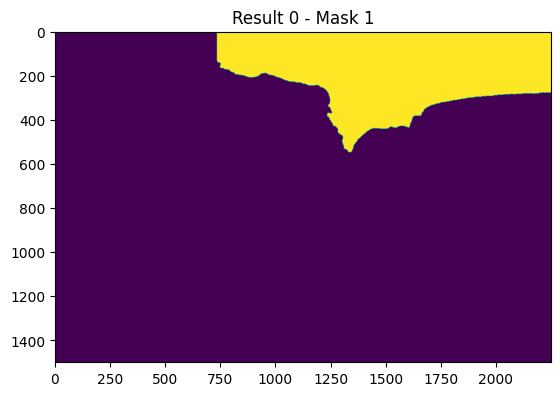

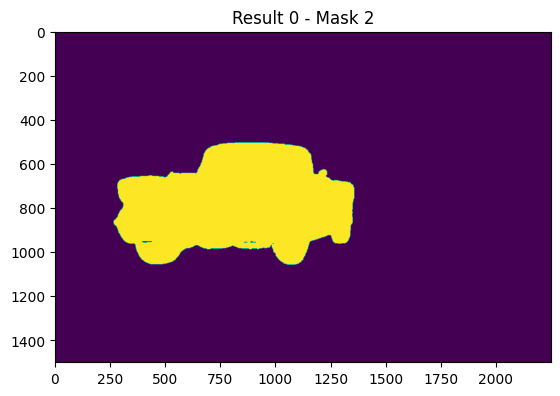

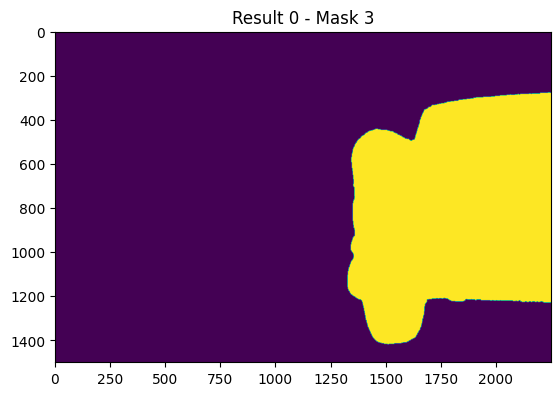

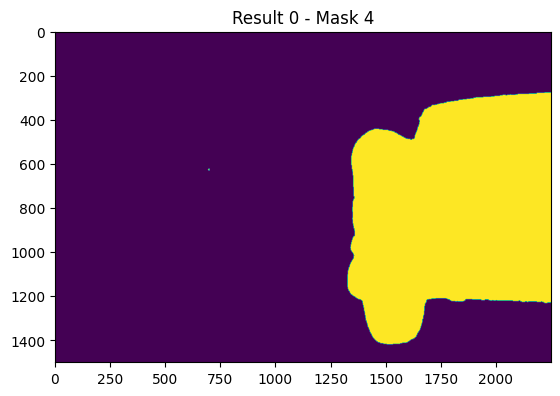

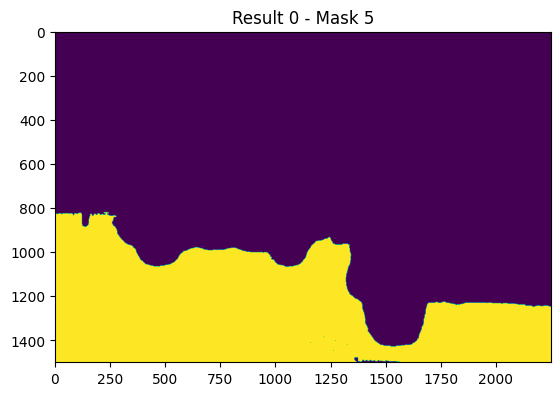

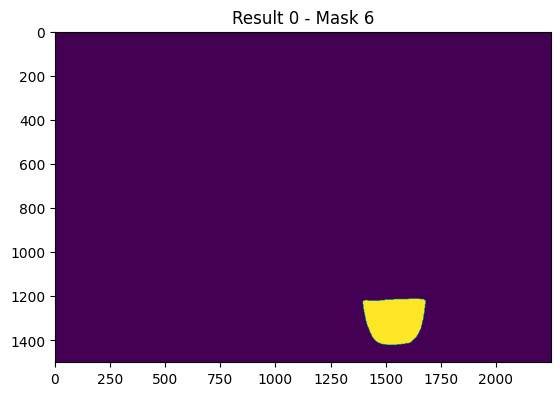

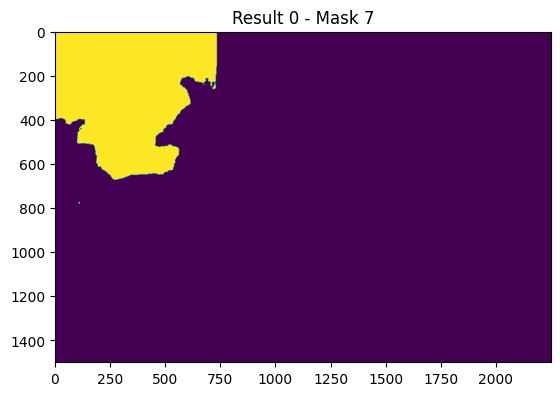

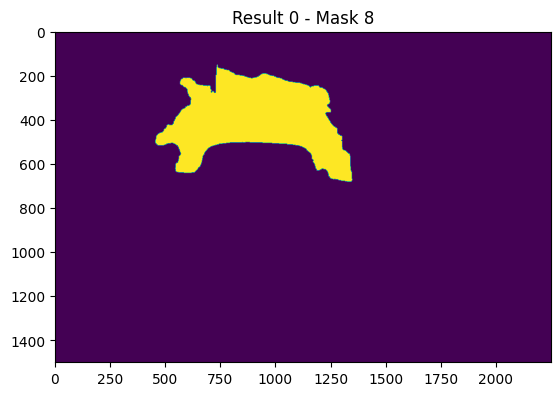

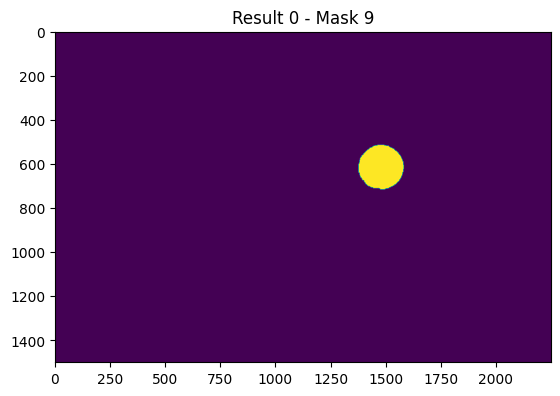

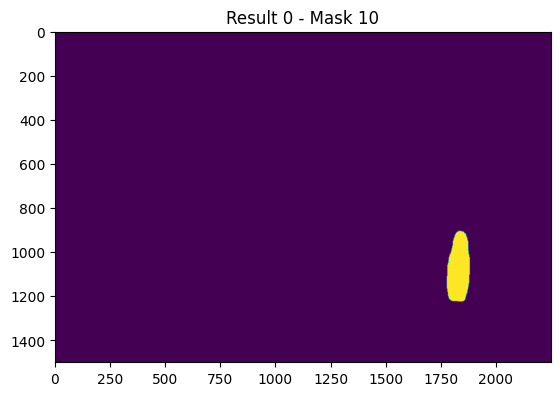

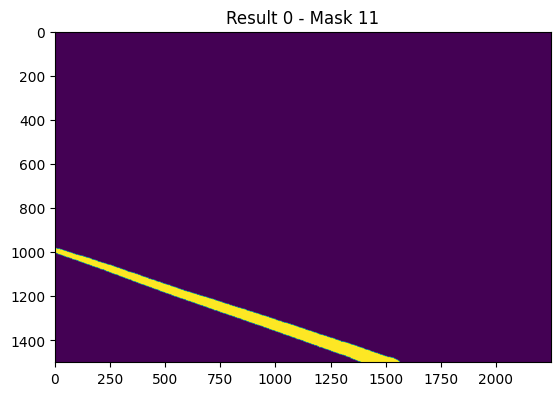

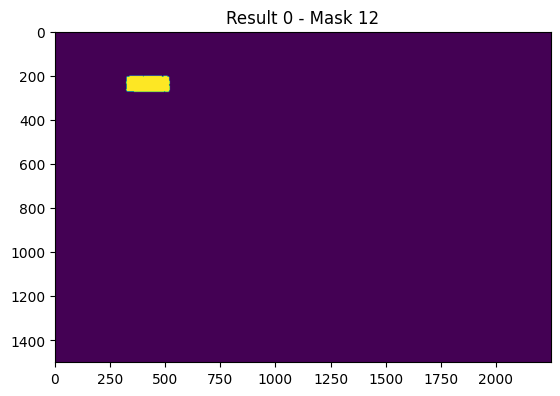

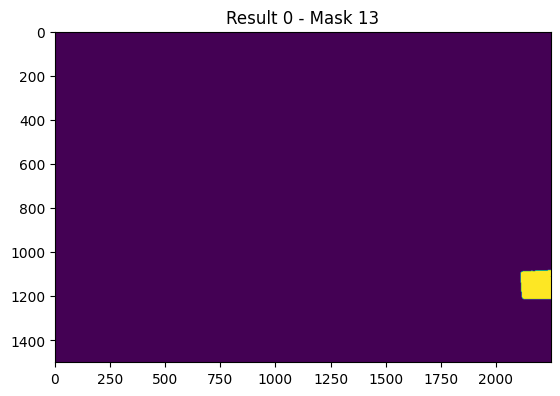

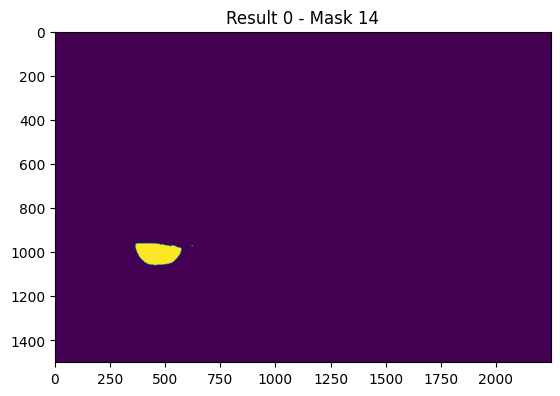

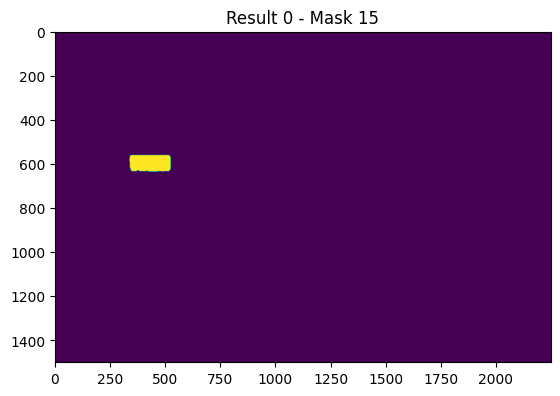

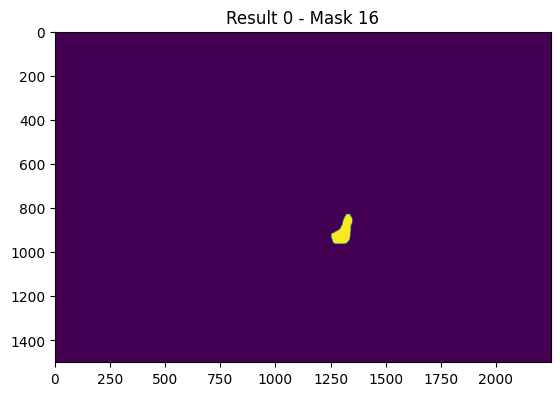

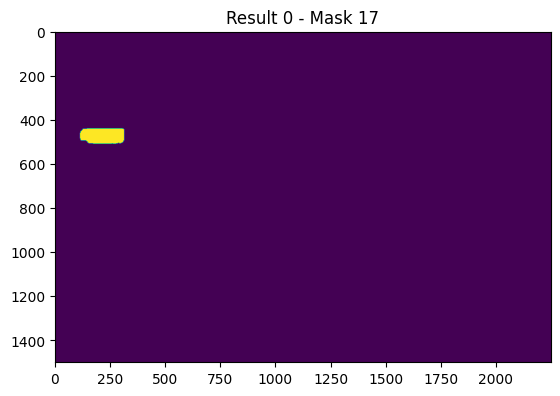

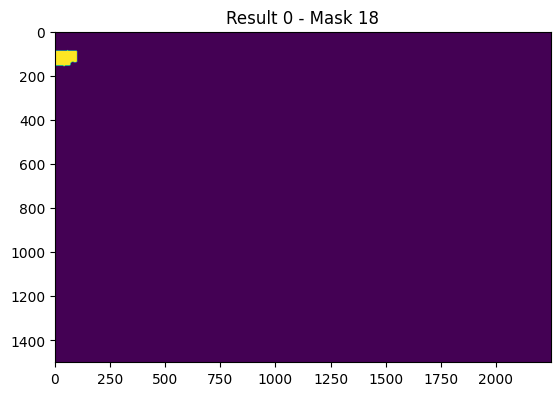

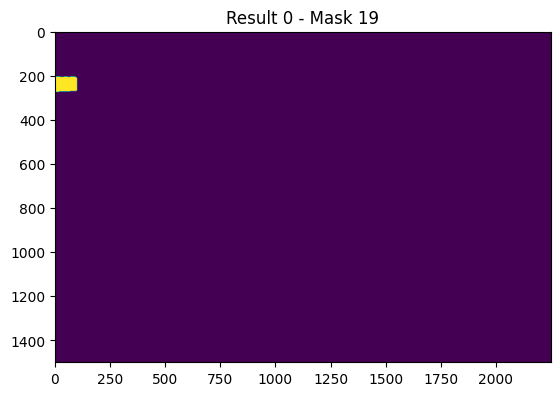

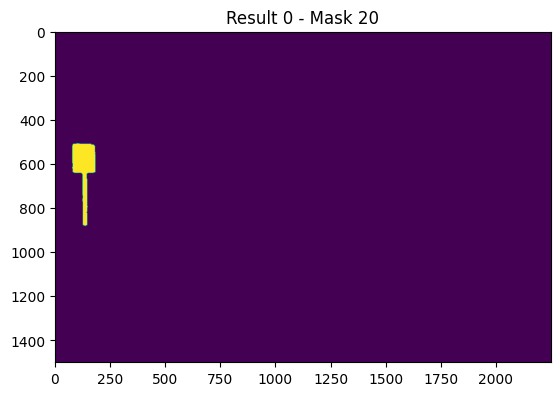

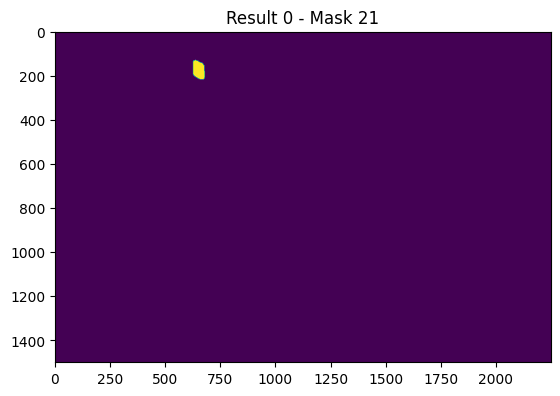

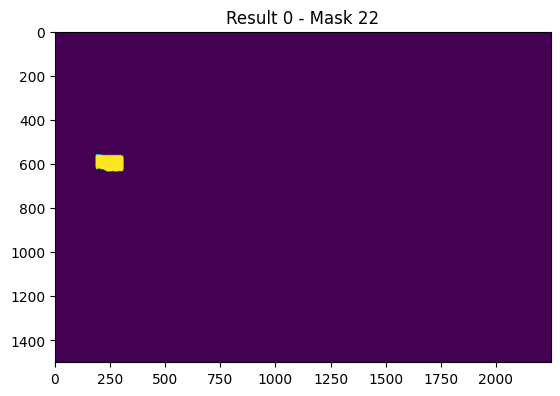

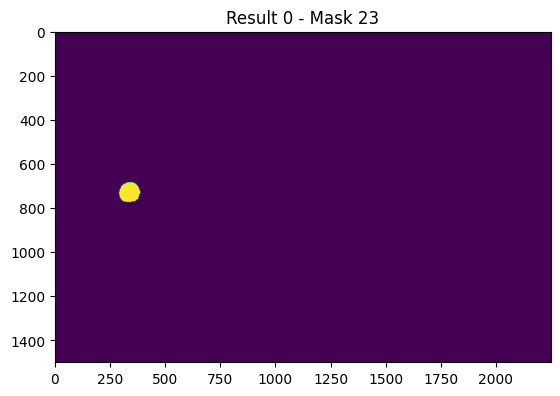

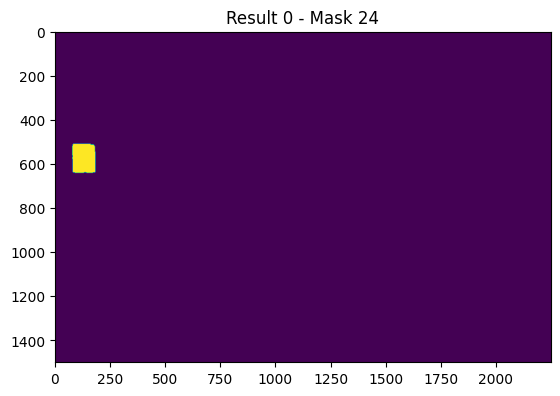

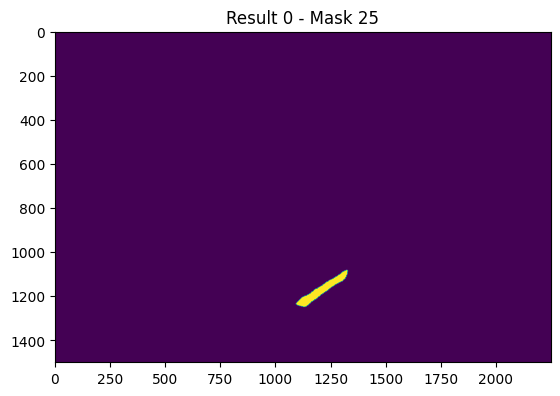

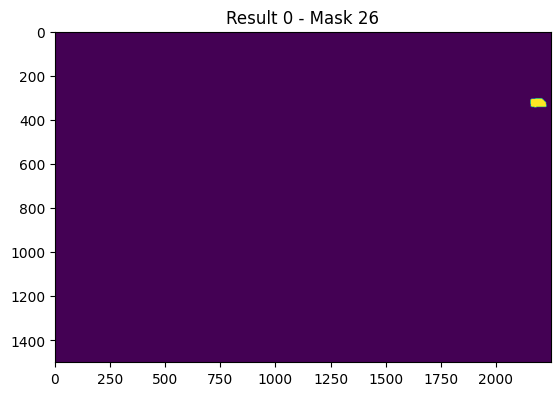

In [16]:
# print(results3)
import matplotlib.pyplot as plt

# Assuming 'results3' is your list of Results objects
for idx, result in enumerate(results3):
    masks = result.masks

    # If masks is a tensor, convert it to a numpy array
    masks_array = masks.data.cpu().numpy()

    # Display the masks using matplotlib
    for i in range(masks_array.shape[0]):
        plt.imshow(masks_array[i])
        plt.title(f'Result {idx} - Mask {i}')
        plt.show()

In [17]:
!pip install \
'git+https://github.com/facebookresearch/segment-anything.git'
!pip install -q roboflow supervision
!wget -q \
'https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth'

  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-3g4n6vi3
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-3g4n6vi3
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
  Created wheel for segment_anything: filename=segment_anything-1.0-py3-none-any.whl size=36591 sha256=cc077183ca6e67dfa84518b5b567f05c1619e2beec48ce9362c4b0e27ae5cb50
  Stored in directory: /tmp/pip-ephem-wheel-cache-me5ofk7p/wheels/10/cf/59/9ccb2f0a1bcc81d4fbd0e501680b5d088d690c6cfbc02dc99d
Successfully built segment_anything
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [20]:

import torch
from segment_anything import sam_model_registry

DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
MODEL_TYPE = "vit_h"

sam = sam_model_registry[MODEL_TYPE](checkpoint='/content/sam_vit_h_4b8939.pth')
sam.to(device=DEVICE)

Sam(
  (image_encoder): ImageEncoderViT(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 1280, kernel_size=(16, 16), stride=(16, 16))
    )
    (blocks): ModuleList(
      (0-31): 32 x Block(
        (norm1): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=1280, out_features=3840, bias=True)
          (proj): Linear(in_features=1280, out_features=1280, bias=True)
        )
        (norm2): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (lin1): Linear(in_features=1280, out_features=5120, bias=True)
          (lin2): Linear(in_features=5120, out_features=1280, bias=True)
          (act): GELU(approximate='none')
        )
      )
    )
    (neck): Sequential(
      (0): Conv2d(1280, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): LayerNorm2d()
      (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (3): LayerNorm2d

In [28]:
import cv2
from segment_anything import SamAutomaticMaskGenerator
import torch

mask_generator = SamAutomaticMaskGenerator(sam)

image_bgr = cv2.imread('/content/sample_data/cars.jpg')
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Ensure the image is a NumPy array of the correct type
image_rgb = image_rgb.astype('float32')

# Convert image to PyTorch tensor and ensure it is in float32 format
image_rgb = torch.from_numpy(image_rgb).permute(2, 0, 1)  # (channels, height, width)

# Wrap the generate call to handle the float conversion
def generate_with_float32(generator, image):
    if image.dtype != torch.float32:
        image = image.float()
    return generator.generate(image)

result = generate_with_float32(mask_generator, image_rgb)

TypeError: Got unsupported ScalarType BFloat16